Import the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats
import pylab
import datetime
from time import time
import seaborn as sns
sns.set()

#time series Libraries
import statsmodels.graphics.tsaplots as sgt 
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 

Import the data 

In [3]:
raw_csv_data = pd.read_csv("sentech_data.csv")

Make a copy of original data

In [4]:
sentech_data= raw_csv_data.copy()

In [5]:
sentech_data

,Date,Air_temp,RH,DewPoint,Rain,Pressure,Efield,Lightning_Warnings,Reset_secs
0,2/27/2022 23:45,15.31052,85.83740,12.966850,0.0,827.4857,-16.63182,0,0
1,2/27/2022 23:30,15.98598,82.16581,12.960260,0.0,827.4928,-17.88704,0,0
2,2/27/2022 23:15,15.81320,81.01760,12.576650,0.0,827.6407,-17.25920,0,0
3,2/27/2022 23:00,15.94644,79.59342,12.436280,0.0,827.6857,-15.37659,0,0
4,2/27/2022 22:45,16.28638,76.22140,12.107980,0.0,827.9321,-14.43517,0,0
...,...,...,...,...,...,...,...,...,...
11405,11/1/2021 1:00,14.49834,72.94492,9.719332,0.0,823.9849,-23.84927,0,0
11406,11/1/2021 0:45,14.64727,71.04126,9.468879,0.0,824.1239,-23.22135,0,0
11407,11/1/2021 0:30,15.17229,67.91439,9.302760,0.0,824.1583,-23.84614,0,0
11408,11/1/2021 0:15,15.88538,60.16803,8.188042,0.0,824.1832,-23.84491,0,0


Load simple static parameters

In [6]:
sentech_data.isna().sum()
#No NaNs

Date                  0
Air_temp              0
RH                    0
DewPoint              0
Rain                  0
Pressure              0
Efield                0
Lightning_Warnings    0
Reset_secs            0
dtype: int64

In [7]:
sentech_data.describe()

,Air_temp,RH,DewPoint,Rain,Pressure,Efield,Lightning_Warnings,Reset_secs
count,11410.000000,11410.000000,11410.000000,11410.000000,11410.000000,11410.000000,11410.000000,11410.000000
mean,18.689568,72.150754,12.816222,0.000035,826.438567,-19.921106,0.108589,314.438212
std,3.924400,20.393162,3.102967,0.002648,15.626958,236.783167,0.311136,965.151379
min,0.000000,0.000000,-3.143647,0.000000,0.000000,-2523.927000,0.000000,0.000000
25%,15.754948,57.802200,11.778005,0.000000,825.406050,-41.416790,0.000000,0.000000
50%,18.324115,74.139575,13.451890,0.000000,826.824550,-29.796630,0.000000,0.000000
75%,21.584875,89.270905,14.794128,0.000000,828.125875,-19.456090,0.000000,0.000000
max,29.734370,99.980700,19.050590,0.200000,833.690200,2562.246000,1.000000,3600.000000


Visualize the data

<AxesSubplot:title={'center':'Electric Field'}>

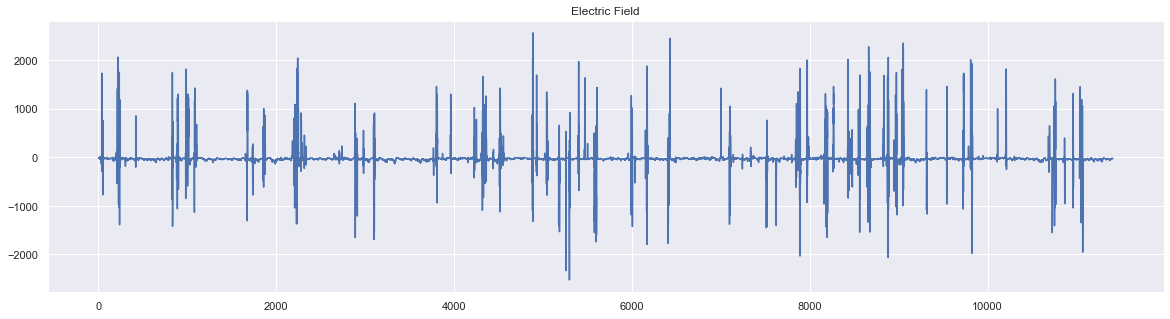

In [8]:
sentech_data.Efield.plot(figsize= (20,5), title= "Electric Field")

<AxesSubplot:title={'center':'Lightning Warnings'}>

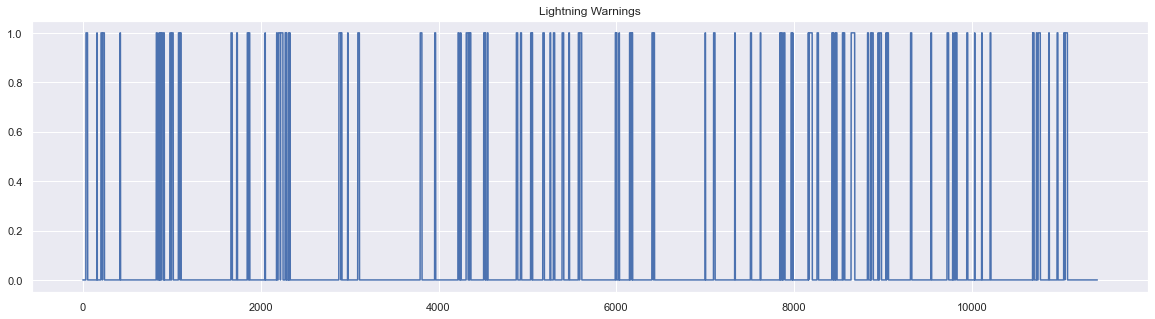

In [9]:
sentech_data.Lightning_Warnings.plot(figsize= (20,5), title= "Lightning Warnings")

Text(0.5, 1.0, 'Electric field vs Lightning Warnings')

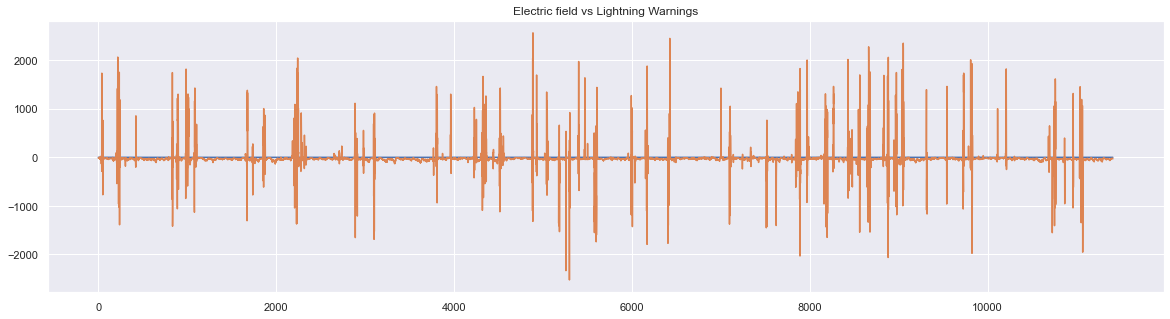

In [10]:
sentech_data.Lightning_Warnings.plot(figsize= (20,5), title= "Lightning Warnings")
sentech_data.Efield.plot(figsize= (20,5), title= "Electric Field")
plt.title("Electric field vs Lightning Warnings")

<AxesSubplot:title={'center':'Air temperature'}>

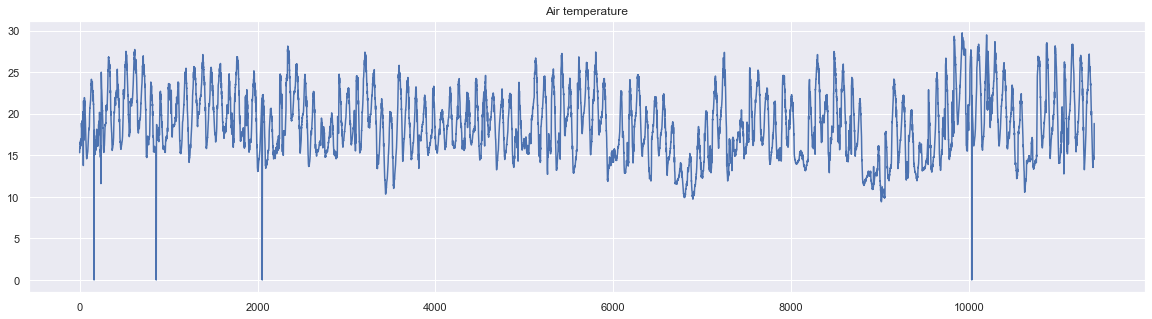

In [11]:
sentech_data.Air_temp.plot(figsize= (20,5), title= "Air temperature")

<AxesSubplot:title={'center':'Relative Humidity'}>

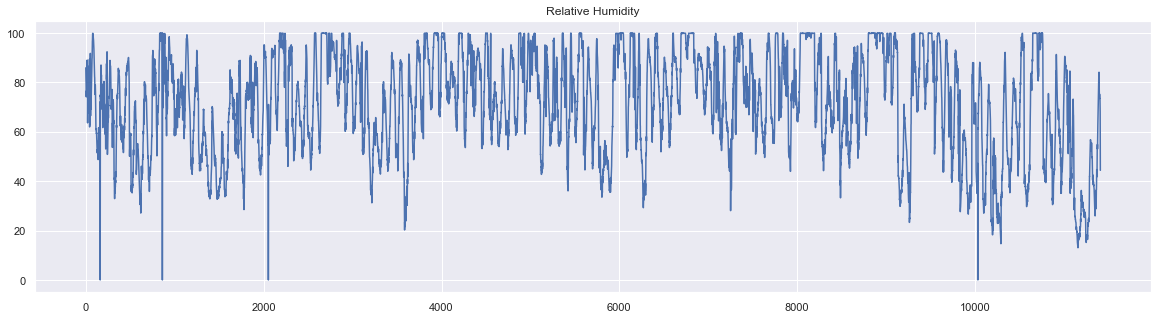

In [12]:
sentech_data.RH.plot(figsize= (20,5), title= "Relative Humidity")

<AxesSubplot:title={'center':'Dew Point'}>

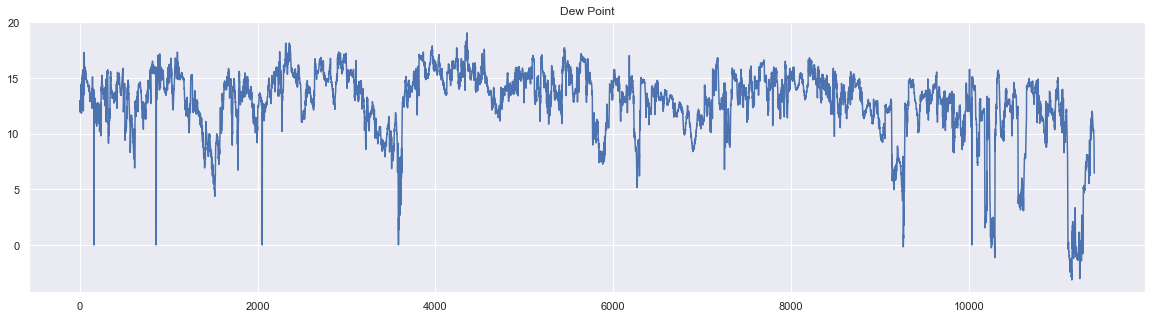

In [13]:
sentech_data.DewPoint.plot(figsize= (20,5), title= "Dew Point")

<AxesSubplot:title={'center':'Rain'}>

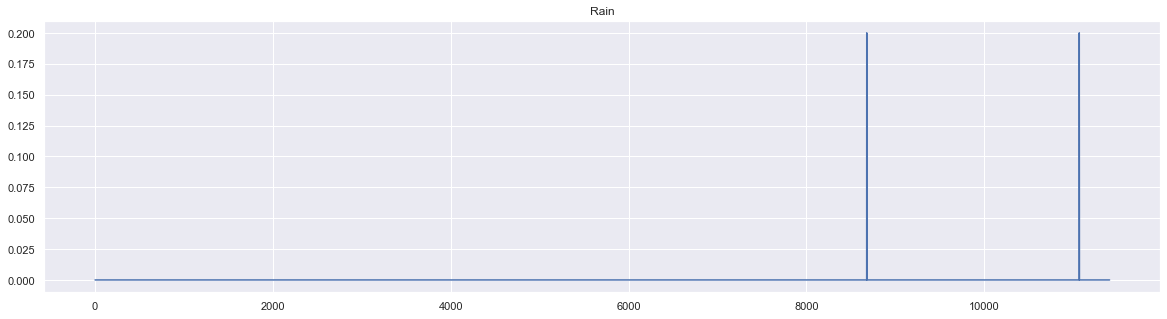

In [14]:
sentech_data.Rain.plot(figsize= (20,5), title= "Rain")

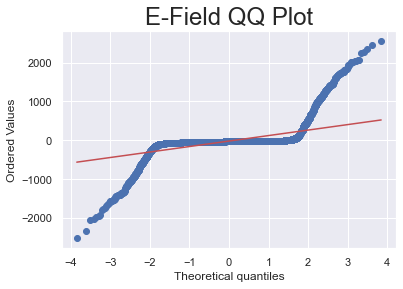

In [15]:
scipy.stats.probplot(sentech_data.Efield, plot = pylab)
plt.title("E-Field QQ Plot", size = 24)
pylab.show()

Converting the date to date object

In [16]:
sentech_data.Date.describe()

count               11410
unique              11410
top       2/27/2022 23:45
freq                    1
Name: Date, dtype: object

In [17]:
sentech_data.Date = pd.to_datetime(sentech_data.Date)

In [18]:
sentech_data

,Date,Air_temp,RH,DewPoint,Rain,Pressure,Efield,Lightning_Warnings,Reset_secs
0,2022-02-27 23:45:00,15.31052,85.83740,12.966850,0.0,827.4857,-16.63182,0,0
1,2022-02-27 23:30:00,15.98598,82.16581,12.960260,0.0,827.4928,-17.88704,0,0
2,2022-02-27 23:15:00,15.81320,81.01760,12.576650,0.0,827.6407,-17.25920,0,0
3,2022-02-27 23:00:00,15.94644,79.59342,12.436280,0.0,827.6857,-15.37659,0,0
4,2022-02-27 22:45:00,16.28638,76.22140,12.107980,0.0,827.9321,-14.43517,0,0
...,...,...,...,...,...,...,...,...,...
11405,2021-11-01 01:00:00,14.49834,72.94492,9.719332,0.0,823.9849,-23.84927,0,0
11406,2021-11-01 00:45:00,14.64727,71.04126,9.468879,0.0,824.1239,-23.22135,0,0
11407,2021-11-01 00:30:00,15.17229,67.91439,9.302760,0.0,824.1583,-23.84614,0,0
11408,2021-11-01 00:15:00,15.88538,60.16803,8.188042,0.0,824.1832,-23.84491,0,0


In [19]:
sentech_data.Date.describe(datetime_is_numeric=True)

count                            11410
mean     2021-12-30 13:12:09.386503168
min                2021-11-01 00:00:00
25%                2021-11-30 20:33:45
50%                2021-12-30 13:37:30
75%                2022-01-29 06:41:15
max                2022-02-27 23:45:00
Name: Date, dtype: object

In [20]:
sentech_data.set_index("Date", inplace=True)

In [21]:
sentech_data

,Air_temp,RH,DewPoint,Rain,Pressure,Efield,Lightning_Warnings,Reset_secs
Date,,,,,,,,
2022-02-27 23:45:00,15.31052,85.83740,12.966850,0.0,827.4857,-16.63182,0,0
2022-02-27 23:30:00,15.98598,82.16581,12.960260,0.0,827.4928,-17.88704,0,0
2022-02-27 23:15:00,15.81320,81.01760,12.576650,0.0,827.6407,-17.25920,0,0
2022-02-27 23:00:00,15.94644,79.59342,12.436280,0.0,827.6857,-15.37659,0,0
2022-02-27 22:45:00,16.28638,76.22140,12.107980,0.0,827.9321,-14.43517,0,0
...,...,...,...,...,...,...,...,...
2021-11-01 01:00:00,14.49834,72.94492,9.719332,0.0,823.9849,-23.84927,0,0
2021-11-01 00:45:00,14.64727,71.04126,9.468879,0.0,824.1239,-23.22135,0,0
2021-11-01 00:30:00,15.17229,67.91439,9.302760,0.0,824.1583,-23.84614,0,0


In [22]:
#Reverse train set to begin with most late date
sentech_data= sentech_data.iloc[::-1]

In [23]:
sentech_data

,Air_temp,RH,DewPoint,Rain,Pressure,Efield,Lightning_Warnings,Reset_secs
Date,,,,,,,,
2021-11-01 00:00:00,18.83013,44.34569,6.449132,0.0,823.9045,-31.68846,0,0
2021-11-01 00:15:00,15.88538,60.16803,8.188042,0.0,824.1832,-23.84491,0,0
2021-11-01 00:30:00,15.17229,67.91439,9.302760,0.0,824.1583,-23.84614,0,0
2021-11-01 00:45:00,14.64727,71.04126,9.468879,0.0,824.1239,-23.22135,0,0
2021-11-01 01:00:00,14.49834,72.94492,9.719332,0.0,823.9849,-23.84927,0,0
...,...,...,...,...,...,...,...,...
2022-02-27 22:45:00,16.28638,76.22140,12.107980,0.0,827.9321,-14.43517,0,0
2022-02-27 23:00:00,15.94644,79.59342,12.436280,0.0,827.6857,-15.37659,0,0
2022-02-27 23:15:00,15.81320,81.01760,12.576650,0.0,827.6407,-17.25920,0,0


Setting the desired frequency (15 min intervals)

In [24]:
sentech_data=sentech_data.asfreq('900s')

#It is tricky using this function because it flips the datapoints and thus creates >50 000 NaN values. Its unacceptable.

In [25]:
sentech_data

,Air_temp,RH,DewPoint,Rain,Pressure,Efield,Lightning_Warnings,Reset_secs
Date,,,,,,,,
2021-11-01 00:00:00,18.83013,44.34569,6.449132,0.0,823.9045,-31.68846,0.0,0.0
2021-11-01 00:15:00,15.88538,60.16803,8.188042,0.0,824.1832,-23.84491,0.0,0.0
2021-11-01 00:30:00,15.17229,67.91439,9.302760,0.0,824.1583,-23.84614,0.0,0.0
2021-11-01 00:45:00,14.64727,71.04126,9.468879,0.0,824.1239,-23.22135,0.0,0.0
2021-11-01 01:00:00,14.49834,72.94492,9.719332,0.0,823.9849,-23.84927,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-02-27 22:45:00,16.28638,76.22140,12.107980,0.0,827.9321,-14.43517,0.0,0.0
2022-02-27 23:00:00,15.94644,79.59342,12.436280,0.0,827.6857,-15.37659,0.0,0.0
2022-02-27 23:15:00,15.81320,81.01760,12.576650,0.0,827.6407,-17.25920,0.0,0.0


Handling Missing Values

In [26]:
sentech_data.isna()

,Air_temp,RH,DewPoint,Rain,Pressure,Efield,Lightning_Warnings,Reset_secs
Date,,,,,,,,
2021-11-01 00:00:00,False,False,False,False,False,False,False,False
2021-11-01 00:15:00,False,False,False,False,False,False,False,False
2021-11-01 00:30:00,False,False,False,False,False,False,False,False
2021-11-01 00:45:00,False,False,False,False,False,False,False,False
2021-11-01 01:00:00,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2022-02-27 22:45:00,False,False,False,False,False,False,False,False
2022-02-27 23:00:00,False,False,False,False,False,False,False,False
2022-02-27 23:15:00,False,False,False,False,False,False,False,False


In [27]:
sentech_data.isna().sum()
#Sum of NaN values is the same as before setting the frequency.

Air_temp              14
RH                    14
DewPoint              14
Rain                  14
Pressure              14
Efield                14
Lightning_Warnings    14
Reset_secs            14
dtype: int64

In [28]:
sentech_data.Air_temp=sentech_data.Air_temp.fillna(method='bfill')

In [29]:
sentech_data.RH=sentech_data.RH.fillna(method='bfill')

In [30]:
sentech_data.DewPoint=sentech_data.DewPoint.fillna(method='bfill')

In [31]:
sentech_data.Pressure=sentech_data.Pressure.fillna(method='bfill')

In [32]:
sentech_data.Efield=sentech_data.Efield.fillna(method='bfill')

In [33]:
sentech_data.Lightning_Warnings=sentech_data.Lightning_Warnings.fillna(method='bfill')

In [34]:
sentech_data.Rain=sentech_data.Rain.fillna(method='bfill')

In [35]:
sentech_data.Reset_secs=sentech_data.Reset_secs.fillna(method='bfill')

In [36]:
sentech_data.isna().sum()

Air_temp              0
RH                    0
DewPoint              0
Rain                  0
Pressure              0
Efield                0
Lightning_Warnings    0
Reset_secs            0
dtype: int64

In [37]:
sentech_data

,Air_temp,RH,DewPoint,Rain,Pressure,Efield,Lightning_Warnings,Reset_secs
Date,,,,,,,,
2021-11-01 00:00:00,18.83013,44.34569,6.449132,0.0,823.9045,-31.68846,0.0,0.0
2021-11-01 00:15:00,15.88538,60.16803,8.188042,0.0,824.1832,-23.84491,0.0,0.0
2021-11-01 00:30:00,15.17229,67.91439,9.302760,0.0,824.1583,-23.84614,0.0,0.0
2021-11-01 00:45:00,14.64727,71.04126,9.468879,0.0,824.1239,-23.22135,0.0,0.0
2021-11-01 01:00:00,14.49834,72.94492,9.719332,0.0,823.9849,-23.84927,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-02-27 22:45:00,16.28638,76.22140,12.107980,0.0,827.9321,-14.43517,0.0,0.0
2022-02-27 23:00:00,15.94644,79.59342,12.436280,0.0,827.6857,-15.37659,0.0,0.0
2022-02-27 23:15:00,15.81320,81.01760,12.576650,0.0,827.6407,-17.25920,0.0,0.0


Simplifying the Dataset- Getting rid of extra columns

In [38]:
# Create a new column extracted from sentech tower
sentech_data['electric_field']=sentech_data.Efield

In [39]:
#Summary statistics
sentech_data.describe()

,Air_temp,RH,DewPoint,Rain,Pressure,Efield,Lightning_Warnings,Reset_secs,electric_field
count,11424.000000,11424.000000,11424.000000,11424.000000,11424.000000,11424.000000,11424.000000,11424.000000,11424.000000
mean,18.666664,72.062334,12.800516,0.000035,825.425774,-19.896693,0.108456,314.052871,-19.896693
std,3.976131,20.536398,3.133315,0.002646,32.862754,236.639048,0.310969,964.622489,236.639048
min,0.000000,0.000000,-3.143647,0.000000,0.000000,-2523.927000,0.000000,0.000000,-2523.927000
25%,15.741075,57.699713,11.769175,0.000000,825.399350,-41.415715,0.000000,0.000000,-41.415715
50%,18.310145,74.093910,13.449530,0.000000,826.821350,-29.795150,0.000000,0.000000,-29.795150
75%,21.583000,89.249578,14.792847,0.000000,828.124700,-19.454477,0.000000,0.000000,-19.454477
max,29.734370,99.980700,19.050590,0.200000,833.690200,2562.246000,1.000000,3600.000000,2562.246000


In [40]:
#Delete the other columns
del sentech_data['Air_temp']
del sentech_data['RH']
del sentech_data['DewPoint']
del sentech_data['Rain']
del sentech_data['Pressure']
del sentech_data['Efield']
del sentech_data['Lightning_Warnings']
del sentech_data['Reset_secs']


In [41]:
sentech_data.describe()

,electric_field
count,11424.000000
mean,-19.896693
std,236.639048
min,-2523.927000
25%,-41.415715
50%,-29.795150
75%,-19.454477
max,2562.246000


Splitting the data set

In [42]:
sentech_data

,electric_field
Date,
2021-11-01 00:00:00,-31.68846
2021-11-01 00:15:00,-23.84491
2021-11-01 00:30:00,-23.84614
2021-11-01 00:45:00,-23.22135
2021-11-01 01:00:00,-23.84927
...,...
2022-02-27 22:45:00,-14.43517
2022-02-27 23:00:00,-15.37659
2022-02-27 23:15:00,-17.25920


In [43]:
size_total = int(len(sentech_data))

In [44]:
print('total data size: ', size_total)

total data size:  11424


In [48]:
#Determine the size of 80% in total data set
size_train = int(len(sentech_data)*0.75)

In [49]:
print('total data size: ', size_train)

total data size:  8568


In [51]:
new_df_train = sentech_data.iloc[:size_train]

In [52]:
new_df_train

,electric_field
Date,
2021-11-01 00:00:00,-31.68846
2021-11-01 00:15:00,-23.84491
2021-11-01 00:30:00,-23.84614
2021-11-01 00:45:00,-23.22135
2021-11-01 01:00:00,-23.84927
...,...
2022-01-29 04:45:00,-30.43941
2022-01-29 05:00:00,-34.20512
2022-01-29 05:15:00,-34.20512


In [53]:
#Export train set as csv file
new_df_train.to_csv('train_dataframe.csv')

In [54]:
#Determine the size of 5% in total data set
size_validate = int(len(sentech_data)*0.05)

In [56]:
#Determine the size of 5% in total data set
size_test = int(len(sentech_data)*0.20)

In [57]:
new_df_validate = sentech_data.iloc[size_train:(size_train+size_validate) ]

In [58]:
new_df_validate

,electric_field
Date,
2022-01-29 06:00:00,-34.513990
2022-01-29 06:15:00,-32.944360
2022-01-29 06:30:00,-32.630570
2022-01-29 06:45:00,-36.081730
2022-01-29 07:00:00,-37.645330
...,...
2022-02-04 03:30:00,13.179710
2022-02-04 03:45:00,4.707116
2022-02-04 04:00:00,-55.230200


In [61]:
#Export test set as csv file
new_df_validate.to_csv('Validate_dataframe.csv')

In [62]:
new_df_test = sentech_data.iloc[(size_train+size_validate):]

In [63]:
new_df_test

,electric_field
Date,
2022-02-04 04:45:00,701.36080
2022-02-04 05:00:00,717.67880
2022-02-04 05:15:00,913.49500
2022-02-04 05:30:00,731.48640
2022-02-04 05:45:00,126.14330
...,...
2022-02-27 22:45:00,-14.43517
2022-02-27 23:00:00,-15.37659
2022-02-27 23:15:00,-17.25920


In [64]:
#Export test set as csv file
new_df_test.to_csv('Test_dataframe.csv')

COrrelations

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

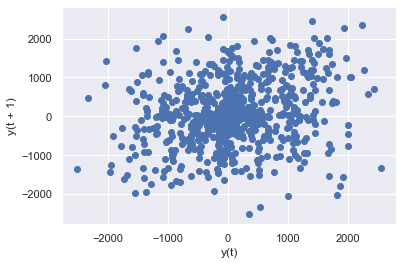

In [65]:
# lagplot
pd.plotting.lag_plot(new_df_train.electric_field, lag=1)

In [66]:
#Correlation Matrix
# using shift function to shift the values.
values= pd.DataFrame(new_df_train.electric_field)

dataframe = pd.concat([values.shift(3), values.shift(2),
                       values.shift(1), values], axis=1)
# naming the columns
dataframe.columns = ['t', 't+1', 't+2', 't+3']
 
# using corr() function to compute the correlation
result = dataframe.corr()
 
print(result)

            t       t+1       t+2       t+3
t    1.000000  0.237023  0.049617  0.097518
t+1  0.237023  1.000000  0.237023  0.049617
t+2  0.049617  0.237023  1.000000  0.237023
t+3  0.097518  0.049617  0.237023  1.000000


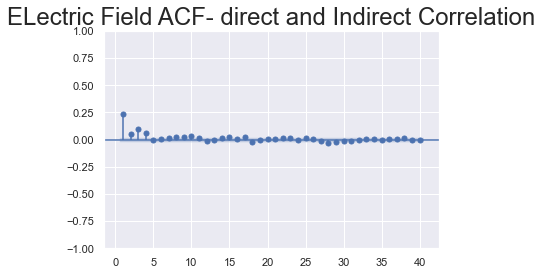

In [67]:
sgt.plot_acf(new_df_train.electric_field, lags= 40, zero= False)
plt.title("ELectric Field ACF- direct and Indirect Correlation", size=24)
plt.show()

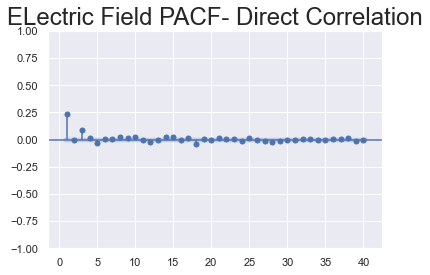

In [68]:
sgt.plot_pacf(new_df_train.electric_field, lags= 40, zero= False, method= ('ols'))
plt.title("ELectric Field PACF- Direct Correlation", size=24)
plt.show()

AR(1) Model

In [69]:
model_ar = ARIMA(new_df_train.electric_field, order=(1,0,0))

In [70]:
results_ar = model_ar.fit()

In [71]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         electric_field   No. Observations:                 8568
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -59004.787
Date:                Sun, 09 Oct 2022   AIC                         118015.575
Time:                        06:02:20   BIC                         118036.742
Sample:                    11-01-2021   HQIC                        118022.795
                         - 01-29-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.2836      3.487     -6.391      0.000     -29.117     -15.450
ar.L1          0.2370      0.003     90.773      0.000       0.232       0.242
sigma2      5.614e+04    204.090    275.053      0.000    5.57e+04    5.65e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):            449890.88
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                             0.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        38.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
#time take to fit/train the model
start= time()
model_fit= model_ar.fit()
end= time()
print('First Order Model training time:', end- start)

First Order Model training time: 0.4378652572631836


AR(10) Model

In [73]:
model_ar_10 = ARIMA(new_df_train.electric_field, order=(10,0,0))
results_ar_10 = model_ar_10.fit()
results_ar_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         electric_field   No. Observations:                 8568
Model:                ARIMA(10, 0, 0)   Log Likelihood              -58956.779
Date:                Sun, 09 Oct 2022   AIC                         117937.557
Time:                        06:02:38   BIC                         118022.227
Sample:                    11-01-2021   HQIC                        117966.439
                         - 01-29-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.2836      4.260     -5.231      0.000     -30.633     -13.935
ar.L1          0.2376      0.003     87.771      0.000       0.232       0.243
ar.L2         -0.0264      0.003     -8.502      0.000      -0.032      -0.020
ar.L3          0.0877      0.003     26.284      0.000       0.081       0.094
ar.L4          0.0237      0.004      6.070      0.000       0.016       0.031
ar.L5         -0.0323      0.004     -7.957      0.000      -0.040      -0.024
ar.L6          0.0016      0.005      0.337      0.736      -0.008       0.011
ar.L7         -0.0012      0.005     -0.223      0.823      -0.012       0.009
ar.L8          0.0205      0.005      3.737      0.000       0.010       0.031
ar.L9          0.0070      0.006      1.172      0.241      -0.005       0.019
ar.L10         0.0250      0.006      3.996      0.000       0.013       0.037
sigma2      5.557e+04    206.535    269.049      0.000    5.52e+04     5.6e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            435207.05
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                             0.91
Prob(H) (two-sided):                  0.00   Kurtosis:                        37.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
#time take to fit/train the model
start= time()
model_fit_10= model_ar_10.fit()
end= time()
print('10 order Model training time:', end- start)

10 order Model training time: 2.565514326095581


LRR Test

In [75]:
def LLR_test(mod_1, mod_10, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_10.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [76]:
LLR_test(model_ar, model_ar_10)

0.0

DF Test

In [77]:
sts.adfuller(new_df_train.electric_field)

(-20.50564738623462,
 0.0,
 17,
 8550,
 {'1%': -3.4311150601592337,
  '5%': -2.861878104766363,
  '10%': -2.56694996825006},
 117440.89778100357)

Normalization

In [78]:
benchmark = new_df_train.electric_field.iloc[0]

In [82]:
new_df_train.electric_field

Date
2021-11-01 00:00:00   -31.68846
2021-11-01 00:15:00   -23.84491
2021-11-01 00:30:00   -23.84614
2021-11-01 00:45:00   -23.22135
2021-11-01 01:00:00   -23.84927
                         ...   
2022-01-29 04:45:00   -30.43941
2022-01-29 05:00:00   -34.20512
2022-01-29 05:15:00   -34.20512
2022-01-29 05:30:00   -36.71558
2022-01-29 05:45:00   -40.47743
Freq: 900S, Name: electric_field, Length: 8568, dtype: float64

In [79]:
new_df_train['norm'] =new_df_train.electric_field.div(benchmark).mul(100)

C:\Users\Oratile\AppData\Local\Temp\ipykernel_516\325599701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_train['norm'] =new_df_train.electric_field.div(benchmark).mul(100)


In [80]:
sts.adfuller(new_df_train.norm)

(-20.50564738623458,
 0.0,
 17,
 8550,
 {'1%': -3.4311150601592337,
  '5%': -2.861878104766363,
  '10%': -2.56694996825006},
 137046.55019459722)

In [81]:
new_df_train.norm

Date
2021-11-01 00:00:00    100.000000
2021-11-01 00:15:00     75.247929
2021-11-01 00:30:00     75.251811
2021-11-01 00:45:00     73.280147
2021-11-01 01:00:00     75.261688
                          ...    
2022-01-29 04:45:00     96.058344
2022-01-29 05:00:00    107.941882
2022-01-29 05:15:00    107.941882
2022-01-29 05:30:00    115.864198
2022-01-29 05:45:00    127.735554
Freq: 900S, Name: norm, Length: 8568, dtype: float64

Analysing the Erorrs (Model Evaluation)

In [84]:
#.resid calls residual function of returned/trained model
new_df_train['residual_Efield'] = results_ar.resid

C:\Users\Oratile\AppData\Local\Temp\ipykernel_516\3707546634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_train['residual_Efield'] = results_ar.resid


In [93]:
#Export trained model as csv file
new_df_train.to_csv('AR_model_dataframe.csv')

In [94]:
#Now get the prediction (test) start date and end date
pred_start_date= new_df_test.index[0]
pred_end_date= new_df_test.index[-1]

In [95]:
#Get the predictions and the residuals
predictions= model_fit.predict(start =pred_start_date, end= pred_end_date )

In [97]:
new_df_test['predictions'] = predictions

C:\Users\Oratile\AppData\Local\Temp\ipykernel_516\1947355127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_test['predictions'] = predictions


In [96]:
predictions

2022-02-04 04:45:00   -22.283644
2022-02-04 05:00:00   -22.283644
2022-02-04 05:15:00   -22.283644
2022-02-04 05:30:00   -22.283644
2022-02-04 05:45:00   -22.283644
                         ...    
2022-02-27 22:45:00   -22.283644
2022-02-27 23:00:00   -22.283644
2022-02-27 23:15:00   -22.283644
2022-02-27 23:30:00   -22.283644
2022-02-27 23:45:00   -22.283644
Freq: 900S, Name: predicted_mean, Length: 2285, dtype: float64

In [182]:
new_df_test

,electric_field
Date,
2022-02-04 04:45:00,701.36080
2022-02-04 05:00:00,717.67880
2022-02-04 05:15:00,913.49500
2022-02-04 05:30:00,731.48640
2022-02-04 05:45:00,126.14330
...,...
2022-02-27 22:45:00,-14.43517
2022-02-27 23:00:00,-15.37659
2022-02-27 23:15:00,-17.25920


In [188]:
residuals_manual= new_df_test- predictions

In [189]:
residuals_manual

,2022-02-04 04:45:00,2022-02-04 05:00:00,2022-02-04 05:15:00,2022-02-04 05:30:00,2022-02-04 05:45:00,2022-02-04 06:00:00,2022-02-04 06:15:00,2022-02-04 06:30:00,2022-02-04 06:45:00,2022-02-04 07:00:00,...,2022-02-27 21:45:00,2022-02-27 22:00:00,2022-02-27 22:15:00,2022-02-27 22:30:00,2022-02-27 22:45:00,2022-02-27 23:00:00,2022-02-27 23:15:00,2022-02-27 23:30:00,2022-02-27 23:45:00,electric_field
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-04 04:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-04 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-04 05:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-04 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-04 05:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-27 22:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-27 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-27 23:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
residuals_manual.mean()

12.589393444697558

In [184]:
new_df_test.electric_field.mean()

-9.711508976017473

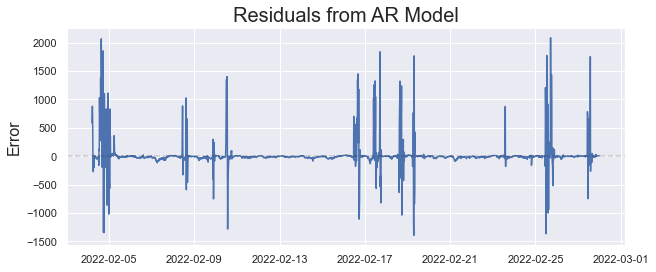

In [174]:
plt.figure(figsize=(10,4))
plt.plot(residuals_manual)
plt.axhline(0, linestyle='--', color='k', alpha= 0.2)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
for year in range(2022, 2022):
     plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [101]:
from sklearn import metrics
print(metrics.mean_absolute_error(new_df_test, predictions))

ValueError: y_true and y_pred have different number of output (2!=1)

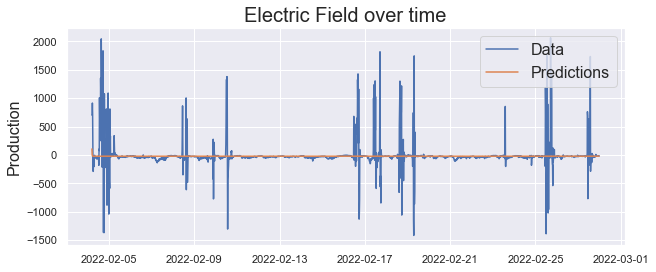

In [187]:
plt.figure(figsize=(10,4))

plt.plot(new_df_test)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Electric Field over time', fontsize=20)
plt.ylabel('Electric Field', fontsize=16)
for year in range(2022,2022):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [178]:
residuals_manual.mean()

12.589393444697558

In [179]:
residuals_manual.var()

56158.71611464021

In [185]:
new_df_test.electric_field.var()

56313.76995091363

Automatically obtained residuals

In [133]:
new_df_train.residual_Efield.mean()

0.014016226542041028

In [134]:
new_df_train.residual_Efield.var()

52751.77668292375

In [138]:
sts.adfuller(new_df_train.residual_Efield)

(-21.309378304800898,
 0.0,
 17,
 9121,
 {'1%': -3.4310671517731812,
  '5%': -2.8618569350602763,
  '10%': -2.5669386994814842},
 124718.6077091124)

Make sure the errors do not follow a white noise distribution

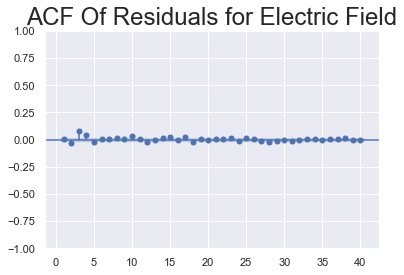

In [139]:
sgt.plot_acf(new_df_train.residual_Efield, zero = False, lags = 40)
plt.title("ACF Of Residuals for Electric Field",size=24)
plt.show()

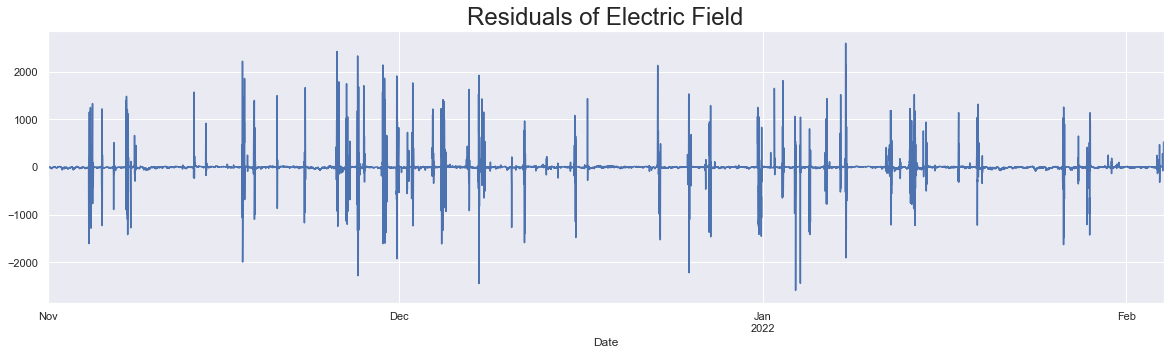

In [141]:
new_df_train.residual_Efield.plot(figsize=(20,5))
plot(new_df_train.)
plt.title("Residuals of Electric Field", size=24)
plt.show()